In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing data into program
BankSy = pd.read_csv("testset.csv")
TrainBank=pd.read_csv("trainset.csv")
BankSy

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,nonexistent,4963.6,no
11913,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,success,4963.6,no
11914,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,nonexistent,4963.6,no
11915,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,nonexistent,4963.6,no


In [ ]:
TrainBank

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29266,49,admin.,married,unknown,no,no,cellular,nov,fri,288,1,999,failure,5195.8,no
29267,34,management,single,university.degree,unknown,unknown,telephone,nov,fri,114,5,999,nonexistent,5195.8,no
29268,29,technician,single,professional.course,no,no,cellular,nov,fri,161,3,999,nonexistent,5195.8,no
29269,57,blue-collar,married,basic.9y,no,yes,cellular,nov,fri,150,2,999,nonexistent,5195.8,no


In [ ]:
#checking data types for each attribute
BankSy.dtypes

age              int64
job             object
marital         object
education       object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
poutcome        object
nr.employed    float64
Subscribed      object
dtype: object

In [ ]:
#replacing the word "unknown" with NaN value so we can use Pandas fillna method
BankSys=BankSy.replace("unknown", np.nan)
TrBank=TrainBank.replace("unknown", np.nan)
BankSys.isna().sum()

age              0
job             70
marital         29
education      504
housing        277
loan           277
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
poutcome         0
nr.employed      0
Subscribed       0
dtype: int64

In [ ]:
TrBank.isna().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [ ]:
#chaning the object data types into numerical data types
#giving different headings to differentiate the original data from the manipulated data
BankSys['education_val'] = BankSys['education']
BankSys['housing_val'] = BankSys['housing']
BankSys['loan_val'] = BankSys['loan']
BankSys['poutcome_val'] = BankSys['poutcome']
BankSys['Subscribed_val'] = BankSys['Subscribed']

#using ordinal encoding for data below
BankSys['education_val'] = BankSys['education_val'].map({'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4,'professional.course': 5, 'university.degree': 6})
BankSys['housing_val'] = BankSys['housing_val'].map({'no': 0, 'yes': 1})
BankSys['loan_val'] = BankSys['loan_val'].map({'no': 0, 'yes': 1})
BankSys['poutcome_val'] = BankSys['poutcome_val'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
BankSys['Subscribed_val'] = BankSys['Subscribed_val'].map({'no': 0, 'yes': 1})

#using one-hot encoding for data below
BankSys = pd.get_dummies(BankSys, columns=['job'])
BankSys = pd.get_dummies(BankSys, columns=['marital'])
BankSys = pd.get_dummies(BankSys, columns=['contact'])
BankSys = pd.get_dummies(BankSys, columns=['month'])
BankSys = pd.get_dummies(BankSys, columns=['day_of_week'])

BankSys

,age,education,housing,loan,duration,campaign,pdays,poutcome,nr.employed,Subscribed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,62,university.degree,no,no,717,2,999,nonexistent,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
1,49,high.school,yes,no,136,2,999,nonexistent,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
2,36,university.degree,no,no,342,1,999,failure,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
3,70,basic.4y,yes,no,131,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
4,60,basic.4y,no,no,98,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,36,university.degree,no,no,254,2,999,nonexistent,4963.6,no,...,0,0,1,0,0,1,0,0,0,0
11913,29,basic.4y,yes,no,112,1,9,success,4963.6,no,...,0,0,1,0,0,1,0,0,0,0
11914,46,professional.course,no,no,383,1,999,nonexistent,4963.6,no,...,0,0,1,0,0,1,0,0,0,0
11915,56,university.degree,yes,no,189,2,999,nonexistent,4963.6,no,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
TrBank['education_val'] = TrBank['education']
TrBank['housing_val'] = TrBank['housing']
TrBank['loan_val'] = TrBank['loan']
TrBank['poutcome_val'] = TrBank['poutcome']
TrBank['Subscribed_val'] = TrBank['Subscribed']
#using ordinal encoding for data below
TrBank['education_val'] = TrBank['education_val'].map({'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4,'professional.course': 5, 'university.degree': 6})
TrBank['housing_val'] = TrBank['housing_val'].map({'no': 0, 'yes': 1})
TrBank['loan_val'] = TrBank['loan_val'].map({'no': 0, 'yes': 1})
TrBank['poutcome_val'] = TrBank['poutcome_val'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
TrBank['Subscribed_val'] = TrBank['Subscribed_val'].map({'no': 0, 'yes': 1})

#using one-hut encoding for data below
TrBank = pd.get_dummies(TrBank, columns=['job'])
TrBank = pd.get_dummies(TrBank, columns=['marital'])
TrBank = pd.get_dummies(TrBank, columns=['contact'])
TrBank = pd.get_dummies(TrBank, columns=['month'])
TrBank = pd.get_dummies(TrBank, columns=['day_of_week'])
TrBank

,age,education,housing,loan,duration,campaign,pdays,poutcome,nr.employed,Subscribed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,41,basic.4y,yes,no,1575,1,999,nonexistent,5191.0,yes,...,0,1,0,0,0,0,1,0,0,0
1,49,university.degree,yes,no,1042,1,999,nonexistent,5191.0,yes,...,0,1,0,0,0,0,1,0,0,0
2,49,basic.9y,no,no,1467,1,999,nonexistent,5191.0,yes,...,0,1,0,0,0,0,1,0,0,0
3,41,professional.course,yes,no,579,1,999,nonexistent,5191.0,yes,...,0,1,0,0,0,0,1,0,0,0
4,45,basic.9y,yes,no,461,1,999,nonexistent,5191.0,yes,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29266,49,NaN,no,no,288,1,999,failure,5195.8,no,...,0,0,1,0,0,1,0,0,0,0
29267,34,university.degree,NaN,NaN,114,5,999,nonexistent,5195.8,no,...,0,0,1,0,0,1,0,0,0,0
29268,29,professional.course,no,no,161,3,999,nonexistent,5195.8,no,...,0,0,1,0,0,1,0,0,0,0
29269,57,basic.9y,no,yes,150,2,999,nonexistent,5195.8,no,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
#replacing all NaN values with median values for the specific coloumn
testdata=BankSys.fillna(BankSys.median())
traindata=TrBank.fillna(TrBank.median())

<ipython-input-8-86ae1b33b3d2>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  testdata=BankSys.fillna(BankSys.median())
<ipython-input-8-86ae1b33b3d2>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  traindata=TrBank.fillna(TrBank.median())


In [ ]:
testdata.head(10)

,age,education,housing,loan,duration,campaign,pdays,poutcome,nr.employed,Subscribed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,62,university.degree,no,no,717,2,999,nonexistent,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
1,49,high.school,yes,no,136,2,999,nonexistent,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
2,36,university.degree,no,no,342,1,999,failure,5017.5,yes,...,0,0,0,1,0,1,0,0,0,0
3,70,basic.4y,yes,no,131,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
4,60,basic.4y,no,no,98,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
5,30,high.school,yes,no,385,2,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
6,21,high.school,no,no,328,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,1,0,0,0
7,36,basic.6y,yes,no,332,1,999,failure,5017.5,yes,...,0,0,0,1,0,0,0,0,1,0
8,33,university.degree,yes,no,148,2,6,success,5017.5,yes,...,0,0,0,1,0,0,0,0,1,0
9,57,high.school,NaN,NaN,513,1,999,nonexistent,5017.5,yes,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#checking correlation between the attributes and the target attribute
correlation1=testdata.corr()['Subscribed_val']
np.abs(correlation1).sort_values()

<ipython-input-10-64687748ea69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1=testdata.corr()['Subscribed_val']


contact_telephone    0.005938
contact_cellular     0.005938
job_management       0.006522
marital_divorced     0.006532
housing_val          0.010960
loan_val             0.011271
job_self-employed    0.016944
job_technician       0.017269
marital_single       0.018577
marital_married      0.021488
day_of_week_thu      0.022717
month_jun            0.027275
day_of_week_wed      0.027336
month_aug            0.032471
job_housemaid        0.039203
job_admin.           0.041155
job_unemployed       0.041354
job_entrepreneur     0.044423
day_of_week_mon      0.044798
day_of_week_fri      0.046796
day_of_week_tue      0.048335
education_val        0.062973
job_services         0.063616
campaign             0.075586
job_student          0.084796
month_apr            0.111786
age                  0.119270
month_sep            0.124659
month_mar            0.138210
month_dec            0.138912
job_retired          0.140046
job_blue-collar      0.142087
month_nov            0.142644
month_oct 

In [ ]:
#using attributes that have ~ 0.01 correlation or higher: age, education, job,month,duration,poutcome,day_of_week
#getting colums of NewBank Dataframe
testdata.columns

Index(['age', 'education', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'poutcome', 'nr.employed', 'Subscribed', 'education_val', 'housing_val',
       'loan_val', 'poutcome_val', 'Subscribed_val', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [ ]:
#correlations between some of the top attributes for the target attribute, compared to eachother
correlation3=testdata.corr()['poutcome_val']['pdays']
correlation4=testdata.corr()['poutcome_val']['nr.employed']
correlation5=testdata.corr()['nr.employed']['pdays']
print("correlation between poutcome and pdays: ", correlation3 )
print("correlation between poutcome and nr.employed: ", correlation4 )
print("correlation between nr.employed and pdays: ", correlation5 )

<ipython-input-12-03e7eb6de2cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation3=testdata.corr()['poutcome_val']['pdays']
<ipython-input-12-03e7eb6de2cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation4=testdata.corr()['poutcome_val']['nr.employed']
<ipython-input-12-03e7eb6de2cc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation5=testdata.corr()['nr.employed']['pdays']


correlation between poutcome and pdays:  -0.7356189671055384
correlation between poutcome and nr.employed:  -0.3231488618140794
correlation between nr.employed and pdays:  0.4014192476252349


Text(0.5, 1.0, 'People Who Subscribed')

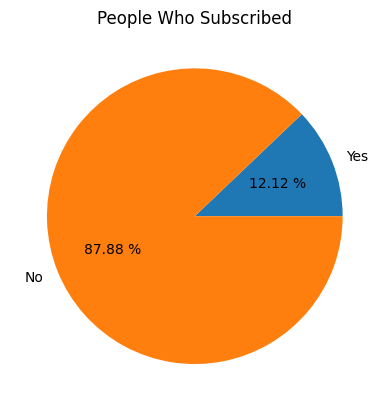

In [ ]:
#pie chart to see the amount of people who subscribed vs did not subscribe in the test data
# for data exploration
yes_pie= testdata['Subscribed'].value_counts()['yes']
no_pie= testdata['Subscribed'].value_counts()['no']
lables=['Yes','No']
plt.pie([yes_pie,no_pie],labels=lables, autopct='%.2f %%')
plt.title("People Who Subscribed")

In [ ]:
#information for stacked bar graph for poutcome vs amount of people who subscribed
success = "success"
no = "no"
yes='yes'
fail = "failure"
nonexist = "nonexistent"
success_no=testdata.loc[(testdata["poutcome"] == success) & (testdata["Subscribed"] == no)].count()[0]
success_yes=testdata.loc[(testdata["poutcome"] == success) & (testdata["Subscribed"] == yes)].count()[0]
fail_no=testdata.loc[(testdata["poutcome"] == fail) & (testdata["Subscribed"] == no)].count()[0]
fail_yes=testdata.loc[(testdata["poutcome"] == fail) & (testdata["Subscribed"] == yes)].count()[0]
nonexit_no=testdata.loc[(testdata["poutcome"] == nonexist) & (testdata["Subscribed"] == no)].count()[0]
nonexit_yes=testdata.loc[(testdata["poutcome"] == nonexist) & (testdata["Subscribed"] == yes)].count()[0]
tot=success_no+success_yes+fail_no+fail_yes+nonexit_no+nonexit_yes


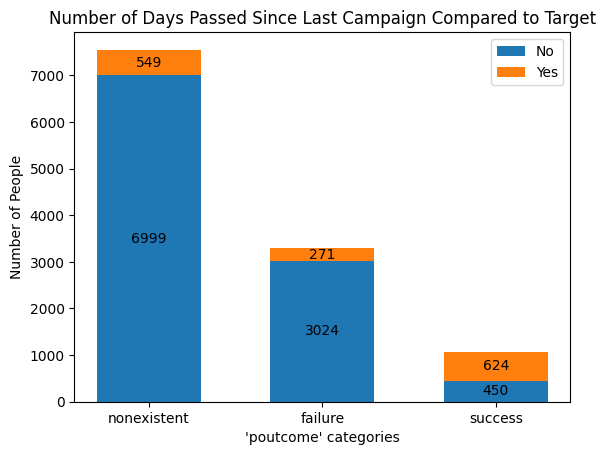

In [ ]:
#stacked bar graph for data exploration
poutcome_lab = ('nonexistent', 'failure', 'success')
y_n_lab = {
    'No': np.array([nonexit_no,fail_no , success_no]),
    'Yes': np.array([nonexit_yes,fail_yes , success_yes]),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(3)

for choice, y_n_lab in y_n_lab.items():
    p = ax.bar(poutcome_lab, y_n_lab, width, label=choice, bottom=bottom)
    bottom += y_n_lab

    ax.bar_label(p, label_type='center')

ax.set_title("Number of Days Passed Since Last Campaign Compared to Target")
ax.legend()
ax.set_ylabel("Number of People")
ax.set_xlabel("'poutcome' categories")

plt.show()

In [ ]:
#comparing the amount of employed people to the target attribute
#for data exploration
employed_vs_subscribed=testdata.groupby(['nr.employed','Subscribed']).size()
print(employed_vs_subscribed)

nr.employed  Subscribed
4963.6       no             334
             yes            301
4991.6       no             370
             yes            403
5008.7       no             281
             yes            369
5017.5       no             617
             yes            283
5023.5       no              84
             yes             88
5076.2       no            1069
5099.1       no            7442
5176.3       no               9
5195.8       no             267
dtype: int64


Text(0.5, 1.0, 'Number of Employees Compared to Target')

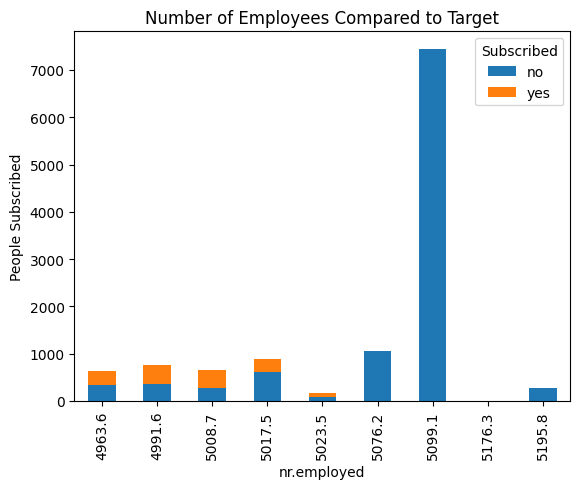

In [ ]:
#stacked bar graph to represent comparison to nr.employed to subscribed
ax= testdata.groupby(['nr.employed','Subscribed']).size().unstack(fill_value=0).plot.bar(ylabel='People Subscribed',stacked=True)
plt.title("Number of Employees Compared to Target")

In [ ]:
#comparing pdays to target attribute to see when the best outcome is
#for data exploration
pdays_vs_subscribed=testdata.groupby(['pdays','Subscribed']).size()
print(pdays_vs_subscribed)

pdays  Subscribed
0      no               3
       yes              7
1      no              17
       yes              4
2      no              24
       yes             10
3      no             135
       yes            191
4      no              47
       yes             22
5      no              14
       yes             17
6      no             114
       yes            252
7      no              20
       yes             35
8      no               6
       yes             10
9      no              29
       yes             30
10     no              22
       yes             18
11     no              13
       yes              8
12     no              32
       yes             21
13     no               8
       yes             19
14     no               9
       yes              9
15     no               8
       yes              7
16     no               5
       yes              5
17     no               6
       yes              2
18     no               3
       yes          

In [ ]:
#modeling decision trees: tree #1
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
tree1 = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)
tree1.fit(traindata[['duration','poutcome_val']],traindata['Subscribed_val'])

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

In [ ]:
#predictions for tree one using 2 attributes
predictions = tree1.predict(testdata[['duration','poutcome_val']])
print(accuracy_score(testdata["Subscribed_val"], predictions))

0.879751615339431


[Text(0.5, 0.875, 'x[0] <= 524.5\ngini = 0.195\nsamples = 29271\nvalue = [26075, 3196]'),
 Text(0.25, 0.625, 'x[1] <= 1.5\ngini = 0.108\nsamples = 25720\nvalue = [24251, 1469]'),
 Text(0.125, 0.375, 'x[0] <= 265.5\ngini = 0.094\nsamples = 25484\nvalue = [24223, 1261]'),
 Text(0.0625, 0.125, 'gini = 0.056\nsamples = 19625\nvalue = [19054, 571]'),
 Text(0.1875, 0.125, 'gini = 0.208\nsamples = 5859\nvalue = [5169, 690]'),
 Text(0.375, 0.375, 'x[0] <= 79.0\ngini = 0.209\nsamples = 236\nvalue = [28, 208]'),
 Text(0.3125, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.4375, 0.125, 'gini = 0.162\nsamples = 225\nvalue = [20, 205]'),
 Text(0.75, 0.625, 'x[0] <= 836.5\ngini = 0.5\nsamples = 3551\nvalue = [1824, 1727]'),
 Text(0.625, 0.375, 'x[1] <= 0.5\ngini = 0.478\nsamples = 2252\nvalue = [1362, 890]'),
 Text(0.5625, 0.125, 'gini = 0.465\nsamples = 2113\nvalue = [1337, 776]'),
 Text(0.6875, 0.125, 'gini = 0.295\nsamples = 139\nvalue = [25, 114]'),
 Text(0.875, 0.375, 'x[1] <= 0.

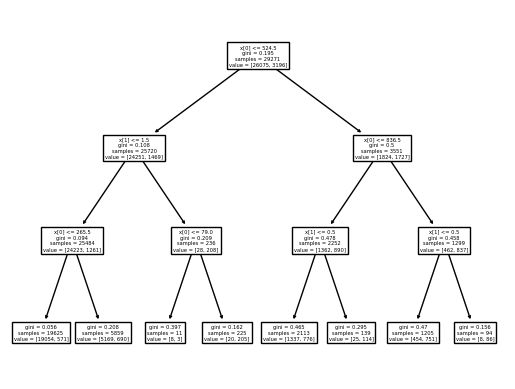

In [ ]:
tree.plot_tree(tree1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testdata['Subscribed_val'], predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10473
           1       0.50      0.50      0.50      1444

    accuracy                           0.88     11917
   macro avg       0.72      0.71      0.72     11917
weighted avg       0.88      0.88      0.88     11917



In [ ]:
predicted_classes = tree1.predict(testdata[['duration','poutcome_val']])
real_classes = testdata['Subscribed_val'].values
confusion_matrix(predicted_classes, real_classes, labels=[1,0])

array([[ 715,  704],
       [ 729, 9769]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(predicted_classes, real_classes, labels=[1,0]).ravel()
(TP, FP, FN, TN)

(715, 704, 729, 9769)

In [ ]:
#Decision Tree #2
tree2 = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)
tree2.fit(traindata[['campaign','pdays','poutcome_val']],traindata['Subscribed_val'])
predictions2 = tree2.predict(testdata[['campaign','pdays','poutcome_val']])
print(accuracy_score(testdata["Subscribed_val"], predictions2))

0.8928421582613074


[Text(0.3958333333333333, 0.9, 'x[1] <= 507.5\ngini = 0.195\nsamples = 29271\nvalue = [26075, 3196]'),
 Text(0.16666666666666666, 0.7, 'x[0] <= 7.0\ngini = 0.166\nsamples = 317\nvalue = [29, 288]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.162\nsamples = 316\nvalue = [28, 288]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.7, 'x[2] <= 0.5\ngini = 0.181\nsamples = 28954\nvalue = [26046, 2908]'),
 Text(0.4166666666666667, 0.5, 'x[0] <= 4.5\ngini = 0.168\nsamples = 28015\nvalue = [25423, 2592]'),
 Text(0.25, 0.3, 'x[0] <= 1.5\ngini = 0.177\nsamples = 24145\nvalue = [21781, 2364]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.189\nsamples = 11325\nvalue = [10126, 1199]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.165\nsamples = 12820\nvalue = [11655, 1165]'),
 Text(0.5833333333333334, 0.3, 'x[0] <= 11.5\ngini = 0.111\nsamples = 3870\nvalue = [3642, 228]'),
 Text(0.5, 0.1, 'gini = 0.124\nsamples = 3207\nvalue = [2994, 213]'),
 Text(0.6666666666666666, 0.1, 'gin

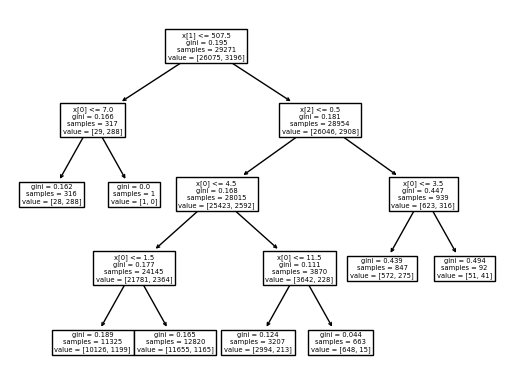

In [ ]:
tree.plot_tree(tree2)

In [ ]:
print(classification_report(testdata['Subscribed_val'], predictions2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10473
           1       0.57      0.47      0.52      1444

    accuracy                           0.89     11917
   macro avg       0.75      0.71      0.73     11917
weighted avg       0.89      0.89      0.89     11917



In [ ]:
predicted_classes = tree2.predict(testdata[['campaign','pdays','poutcome_val']])
real_classes = testdata['Subscribed_val'].values
confusion_matrix(predicted_classes, real_classes, labels=[1,0])

array([[ 679,  512],
       [ 765, 9961]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(predicted_classes, real_classes, labels=[1,0]).ravel()
(TP, FP, FN, TN)

(679, 512, 765, 9961)

In [ ]:
# Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

In [ ]:
#Regression model 1
lm.fit(traindata[['age','campaign','duration','pdays']],traindata['Subscribed_val'])

LogisticRegression()

In [ ]:
print("weights of the model are:", lm.coef_)

print("intercept of the model is:", lm.intercept_)

weights of the model are: [[-0.00449149 -0.11604727  0.00428653 -0.00481527]]
intercept of the model is: [1.48661416]


In [ ]:
predicted_classes = lm.predict(testdata[['age','campaign','duration','pdays']])

In [ ]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
real_classes = testdata['Subscribed_val'].values

In [ ]:
real_classes

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Calculate accuracy
accuracy = sum(real_classes == predicted_classes) / len(real_classes)
print("the accuracy of this model is:", accuracy)

the accuracy of this model is: 0.8838633884366871


In [ ]:
print('number of (1) in real_classes is:', sum(real_classes))
print('number of (0) in real_classes is:', (len(real_classes) - sum(real_classes)))

number of (1) in real_classes is: 1444
number of (0) in real_classes is: 10473


In [ ]:
confusion_matrix(predicted_classes, real_classes, labels=[1,0])


array([[ 725,  665],
       [ 719, 9808]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(predicted_classes, real_classes, labels=[1,0]).ravel()
(TP, FP, FN, TN)

(725, 665, 719, 9808)

In [ ]:
#Regression model 2
lm.fit(traindata[['campaign','poutcome_val','pdays']],traindata['Subscribed_val'])

LogisticRegression()

In [ ]:
print("weights of the model are:", lm.coef_)

print("intercept of the model is:", lm.intercept_)

weights of the model are: [[-0.09004007  1.37785858 -0.00243829]]
intercept of the model is: [0.39073572]


In [ ]:
predicted_classes = lm.predict(testdata[['campaign','poutcome_val','pdays']])

In [ ]:
real_classes = testdata['Subscribed_val'].values

In [ ]:
# Calculate accuracy
accuracy = sum(real_classes == predicted_classes) / len(real_classes)
print("the accuracy of this model is:", accuracy)

the accuracy of this model is: 0.8922547621045566


In [ ]:
confusion_matrix(predicted_classes, real_classes, labels=[1,0])

array([[ 679,  519],
       [ 765, 9954]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(predicted_classes, real_classes, labels=[1,0]).ravel()
(TP, FP, FN, TN)

(679, 519, 765, 9954)

In [ ]:
#Regression model 3
lm.fit(traindata[['age','duration']],traindata['Subscribed_val'])

LogisticRegression()

In [ ]:
print("weights of the model are:", lm.coef_)

print("intercept of the model is:", lm.intercept_)

weights of the model are: [[-0.00306229  0.00413896]]
intercept of the model is: [-3.47484999]


In [ ]:
predicted_classes = lm.predict(testdata[['age','duration']])

In [ ]:
real_classes = testdata['Subscribed_val'].values

In [ ]:
#Calculate accuracy
accuracy = sum(real_classes == predicted_classes) / len(real_classes)
print("the accuracy of this model is:", accuracy)

the accuracy of this model is: 0.871528069144919


In [ ]:
confusion_matrix(predicted_classes, real_classes, labels=[1,0])

array([[   75,   162],
       [ 1369, 10311]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(predicted_classes, real_classes, labels=[1,0]).ravel()
(TP, FP, FN, TN)

(75, 162, 1369, 10311)